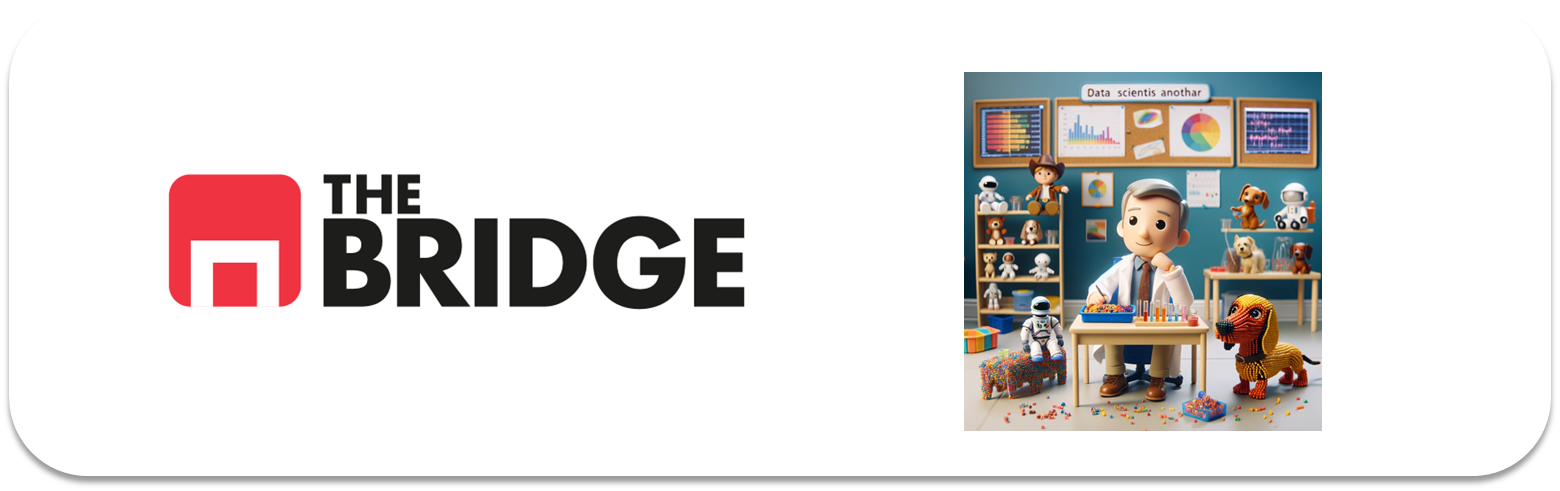

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [5]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [6]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [8]:
# vamos a ver cuántos nulos hay con isna()
# y la suma de esos nulos con .sum()
df_titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
# vamos a hacerlo porcentaje usando.mean() *100
df_titanic.isna().mean()*100


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [10]:
# tenemos que el porcentaje de nulos de age es casi 20%, 
# lo podemos rellenar con la media
df_titanic_2 = df_titanic.copy()
df_titanic_2["age"].mean()
# nos da 29.69, voy a redondearlo a 29

np.float64(29.69911764705882)

In [11]:
# y ahora relleno esos valores faltantes con la media:
# df_titanic_2.loc[df_titanic_2["age"].isna(), "age"] = 29 <-- aqui lo cambio directamente
df_titanic_2.loc[df_titanic_2["age"].isna(), "age"] = int(df_titanic_2["age"].mean())
# "age"] = int(df_titanic_2["age"].mean()) aqui la media la convierto en int y es 29

In [12]:
df_titanic_2["age"].isna().sum()

np.int64(0)

In [13]:
# el age no debería ser float, lo pasamos a int usando astype(int)
df_titanic_2["age"] = df_titanic_2["age"].astype(int)

In [14]:
df_titanic_2.info() # aqui ya no hay nulos en age y ya es int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    int64  
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(7)
memory usage: 92.4+ KB


In [15]:
# para embarked con ese porcentaje tan bajo, lo llenaremos de moda
# porque es un object, no podremos hacer media
df_titanic_2["embarked"].mode() # saco la moda
# luego sustituto los nulos por la moda:
df_titanic_2.loc[df_titanic_2["embarked"].isna(), "embarked"] = df_titanic_2["embarked"].mode()[0]
# el mode()[0] es porque nos quedaremos con un solo valor porque mode() devuelve una serie
# no devuelve un único valor, entonces no podemos asignar una serie a una celda
# y con el [0] nos quedamos con el primer valor
df_titanic_2.info() # aqui vemos que ya no hay nulos en embarked:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    int64  
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(7)
memory usage: 92.4+ KB


In [16]:
# para deck son muchos, los borraremos directamente
df_titanic_2.drop(columns=["deck"], inplace = True) # el inplace la borra
df_titanic_2.info() # aqui ya no aparece

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    int64  
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(6)
memory usage: 85.4+ KB


In [17]:
# para embark_town usaremos la moda:
df_titanic_2["embark_town"].mode() # saco la moda
# luego sustituto los nulos por la moda:
df_titanic_2.loc[df_titanic_2["embark_town"].isna(), "embark_town"] = df_titanic_2["embark_town"].mode()[0]
# y con el [0] otra vez nos quedamos con el primer valor
df_titanic_2.info() # aqui vemos que ya no hay nulos en embark_town:
# ni hay nulos en nada más!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    int64  
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(1), int64(5), object(6)
memory usage: 85.4+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived         | si sobrevivió o no (0 no, 1 sí, valor int)|
| pclass           | la clase en la que embarcó (igual que 'class', valor int)|
| sex              | sexo masculino / femenino |
| age              | edad |
| sibsp            | nº hermanos o esposo/a con quienes viaja - siblings o spouse |
| parch            | número de parents o children con quienes viaja la persona|
| fare             | costo que pagó de billete |
| embarked         | Inicial de la ciudad donde embarcó (igual que 'embark_town')|
| class            | Clase en la que embarcó (igual que 'pclass' pero valor str) |
| who              | hombre / mujer - igual que 'sex' pero con otro término|
| adult_male       | Si era hombre adulto o no, bool |
| embark_town      | Desde dónde embarcó, igual que 'embarked' |
| alive            | Si sobrevivió o no (igual que 'survived' pero valor str) |
| alone            | True si viajaba solo; False si viajaba acompañado, bool |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [18]:
df_titanic_2.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [19]:
# haré una función, así solo sea aplicable para esta columna:
# no le puedo dar como argumento directamente la columna embarked
# entonces uso un argumento inventado city_embarked
# creo las condiciones, y uso directamente el return
def cambiar_inicial(city_embarked):
    if city_embarked == "S":
        return "Southampton"
    elif city_embarked == "C":
        return "Cherbourg"
    else:
        return "Queenstown"

# aquí, renombro los valores de la columna embarked
# apply de la función a la columna embarked, lo hace para cada fila
# y me devuelve mi df con la columna embarked cambiada!
df_titanic_2.embarked = df_titanic_2["embarked"].apply(cambiar_inicial)
df_titanic_2


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,Southampton,Third,man,True,Southampton,no,False
1,1,1,female,38,1,0,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,Southampton,First,woman,False,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,Southampton,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,Southampton,Second,man,True,Southampton,no,True
887,1,1,female,19,0,0,30.0000,Southampton,First,woman,False,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,Southampton,Third,woman,False,Southampton,no,False
889,1,1,male,26,0,0,30.0000,Cherbourg,First,man,True,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [20]:
# OBJETIVO: ESTUDIAR LA SUPERVIVENCIA Y MORTALIDAD EN EL VIAJE
# Primero, vamos a ver las medias:

df_titanic_2.describe().loc["mean"]
# obtenemos que sobrevivió muy poca gente
# la media de pclass era Clase 2,
# la edad media era de 29 años
# más del 50% viajaba con hermanos o parejas
# aprox 38% viajaban con padres o niños
# el costo medio que pagaron fue aprox 32.000 fee

survived     0.383838
pclass       2.308642
age         29.544332
sibsp        0.523008
parch        0.381594
fare        32.204208
Name: mean, dtype: float64

In [21]:
# vamos a ver las medianas a ver si nos aportan más:
df_titanic_2.describe().loc["50%"]
# vemos gran diferencia entre el fare, esto puede ser interesante
# para continuar analizando


survived     0.0000
pclass       3.0000
age         29.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
Name: 50%, dtype: float64

In [22]:
# selecciono solamente las columnas que quiero analizar:
categoricas_titanic = [
    "survived",
    "age",
    "fare",
    "embarked",
    "class",
    "who",
    "alone"
]

In [23]:
df_titanic_2[categoricas_titanic].mode().T

,0
survived,0
age,29
fare,8.05
embarked,Southampton
class,Third
who,man
alone,True


#### Perfil típico del pasajero medio del Titanic: ####
Pasajero que no sobrevivió, hombre de aprox 29 años, de 3ª clase, que viajaba solo, embarcado en Southampton. El costo del fare era aprox. 8000

In [24]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [25]:
def plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5):
    # Prepara los datos
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    # Convierte a frecuencias relativas si se solicita
    if relative_freq:
        count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    # Si hay más de size_group categorías en cat_col1, las divide en grupos de size_group
    unique_categories = df[cat_col1].unique()
    if len(unique_categories) > size_group:
        num_plots = int(np.ceil(len(unique_categories) / size_group))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * size_group:(i + 1) * size_group]
            data_subset = count_data[count_data[cat_col1].isin(categories_subset)]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=data_subset, order=categories_subset)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {cat_col1} y {cat_col2} - Grupo {i + 1}')
            plt.xlabel(cat_col1)
            plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de size_group categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {cat_col1} y {cat_col2}')
        plt.xlabel(cat_col1)
        plt.ylabel('Frecuencia' if relative_freq else 'Conteo')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, size_group),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

In [26]:
def plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):
    # Calcula la medida de tendencia central (mean o median)
    if measure == 'median':
        grouped_data = df.groupby(categorical_col)[numerical_col].median()
    else:
        # Por defecto, usa la media
        grouped_data = df.groupby(categorical_col)[numerical_col].mean()

    # Ordena los valores
    grouped_data = grouped_data.sort_values(ascending=False)

    # Si hay más de 5 categorías, las divide en grupos de 5
    if grouped_data.shape[0] > 5:
        unique_categories = grouped_data.index.unique()
        num_plots = int(np.ceil(len(unique_categories) / 5))

        for i in range(num_plots):
            # Selecciona un subconjunto de categorías para cada gráfico
            categories_subset = unique_categories[i * 5:(i + 1) * 5]
            data_subset = grouped_data.loc[categories_subset]

            # Crea el gráfico
            plt.figure(figsize=(10, 6))
            ax = sns.barplot(x=data_subset.index, y=data_subset.values)

            # Añade títulos y etiquetas
            plt.title(f'Relación entre {categorical_col} y {numerical_col} - Grupo {i + 1}')
            plt.xlabel(categorical_col)
            plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
            plt.xticks(rotation=45)

            # Mostrar valores en el gráfico
            if show_values:
                for p in ax.patches:
                    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                                textcoords='offset points')

            # Muestra el gráfico
            plt.show()
    else:
        # Crea el gráfico para menos de 5 categorías
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(x=grouped_data.index, y=grouped_data.values)

        # Añade títulos y etiquetas
        plt.title(f'Relación entre {categorical_col} y {numerical_col}')
        plt.xlabel(categorical_col)
        plt.ylabel(f'{measure.capitalize()} de {numerical_col}')
        plt.xticks(rotation=45)

        # Mostrar valores en el gráfico
        if show_values:
            for p in ax.patches:
                ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

        # Muestra el gráfico
        plt.show()

In [27]:
def plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0], bins= "auto" if not bins else bins)
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

In [28]:
def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):
    """
    Crea un diagrama de dispersión entre dos columnas y opcionalmente muestra la correlación.

    Args:
    df (pandas.DataFrame): DataFrame que contiene los datos.
    columna_x (str): Nombre de la columna para el eje X.
    columna_y (str): Nombre de la columna para el eje Y.
    tamano_puntos (int, opcional): Tamaño de los puntos en el gráfico. Por defecto es 50.
    mostrar_correlacion (bool, opcional): Si es True, muestra la correlación en el gráfico. Por defecto es False.
    """

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=columna_x, y=columna_y, s=tamano_puntos)

    if mostrar_correlacion:
        correlacion = df[[columna_x, columna_y]].corr().iloc[0, 1]
        plt.title(f'Diagrama de Dispersión con Correlación: {correlacion:.2f}')
    else:
        plt.title('Diagrama de Dispersión')

    plt.xlabel(columna_x)
    plt.ylabel(columna_y)
    plt.grid(True)
    plt.show()

In [29]:
def bubble_plot(df, col_x, col_y, col_size, scale = 1000):
    """
    Crea un scatter plot usando dos columnas para los ejes X e Y,
    y una tercera columna para determinar el tamaño de los puntos.

    Args:
    df (pd.DataFrame): DataFrame de pandas.
    col_x (str): Nombre de la columna para el eje X.
    col_y (str): Nombre de la columna para el eje Y.
    col_size (str): Nombre de la columna para determinar el tamaño de los puntos.
    """

    # Asegúrate de que los valores de tamaño sean positivos
    sizes = (df[col_size] - df[col_size].min() + 1)/scale

    plt.scatter(df[col_x], df[col_y], s=sizes)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.title(f'Burbujas de {col_x} vs {col_y} con Tamaño basado en {col_size}')
    plt.show()


In [30]:
# FRECUENCIAS ABSOLUTAS:
for categoria in categoricas_titanic:
    print(f"Para {categoria}")
    print(df_titanic_2[categoria].value_counts())
    print("\n*2")
    # aqui entra en juego los niños y adultos,
    # por ejemplo de 577 hombres, 537 eran adultos, entonces habían 40 niños varones
    # y de 83 niños, entonces 43 eran niñas

Para survived
survived
0    549
1    342
Name: count, dtype: int64

*2
Para age
age
29    197
24     31
22     27
28     27
30     27
     ... 
66      1
53      1
80      1
12      1
74      1
Name: count, Length: 71, dtype: int64

*2
Para fare
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

*2
Para embarked
embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

*2
Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64

*2
Para who
who
man      537
woman    271
child     83
Name: count, dtype: int64

*2
Para alone
alone
True     537
False    354
Name: count, dtype: int64

*2


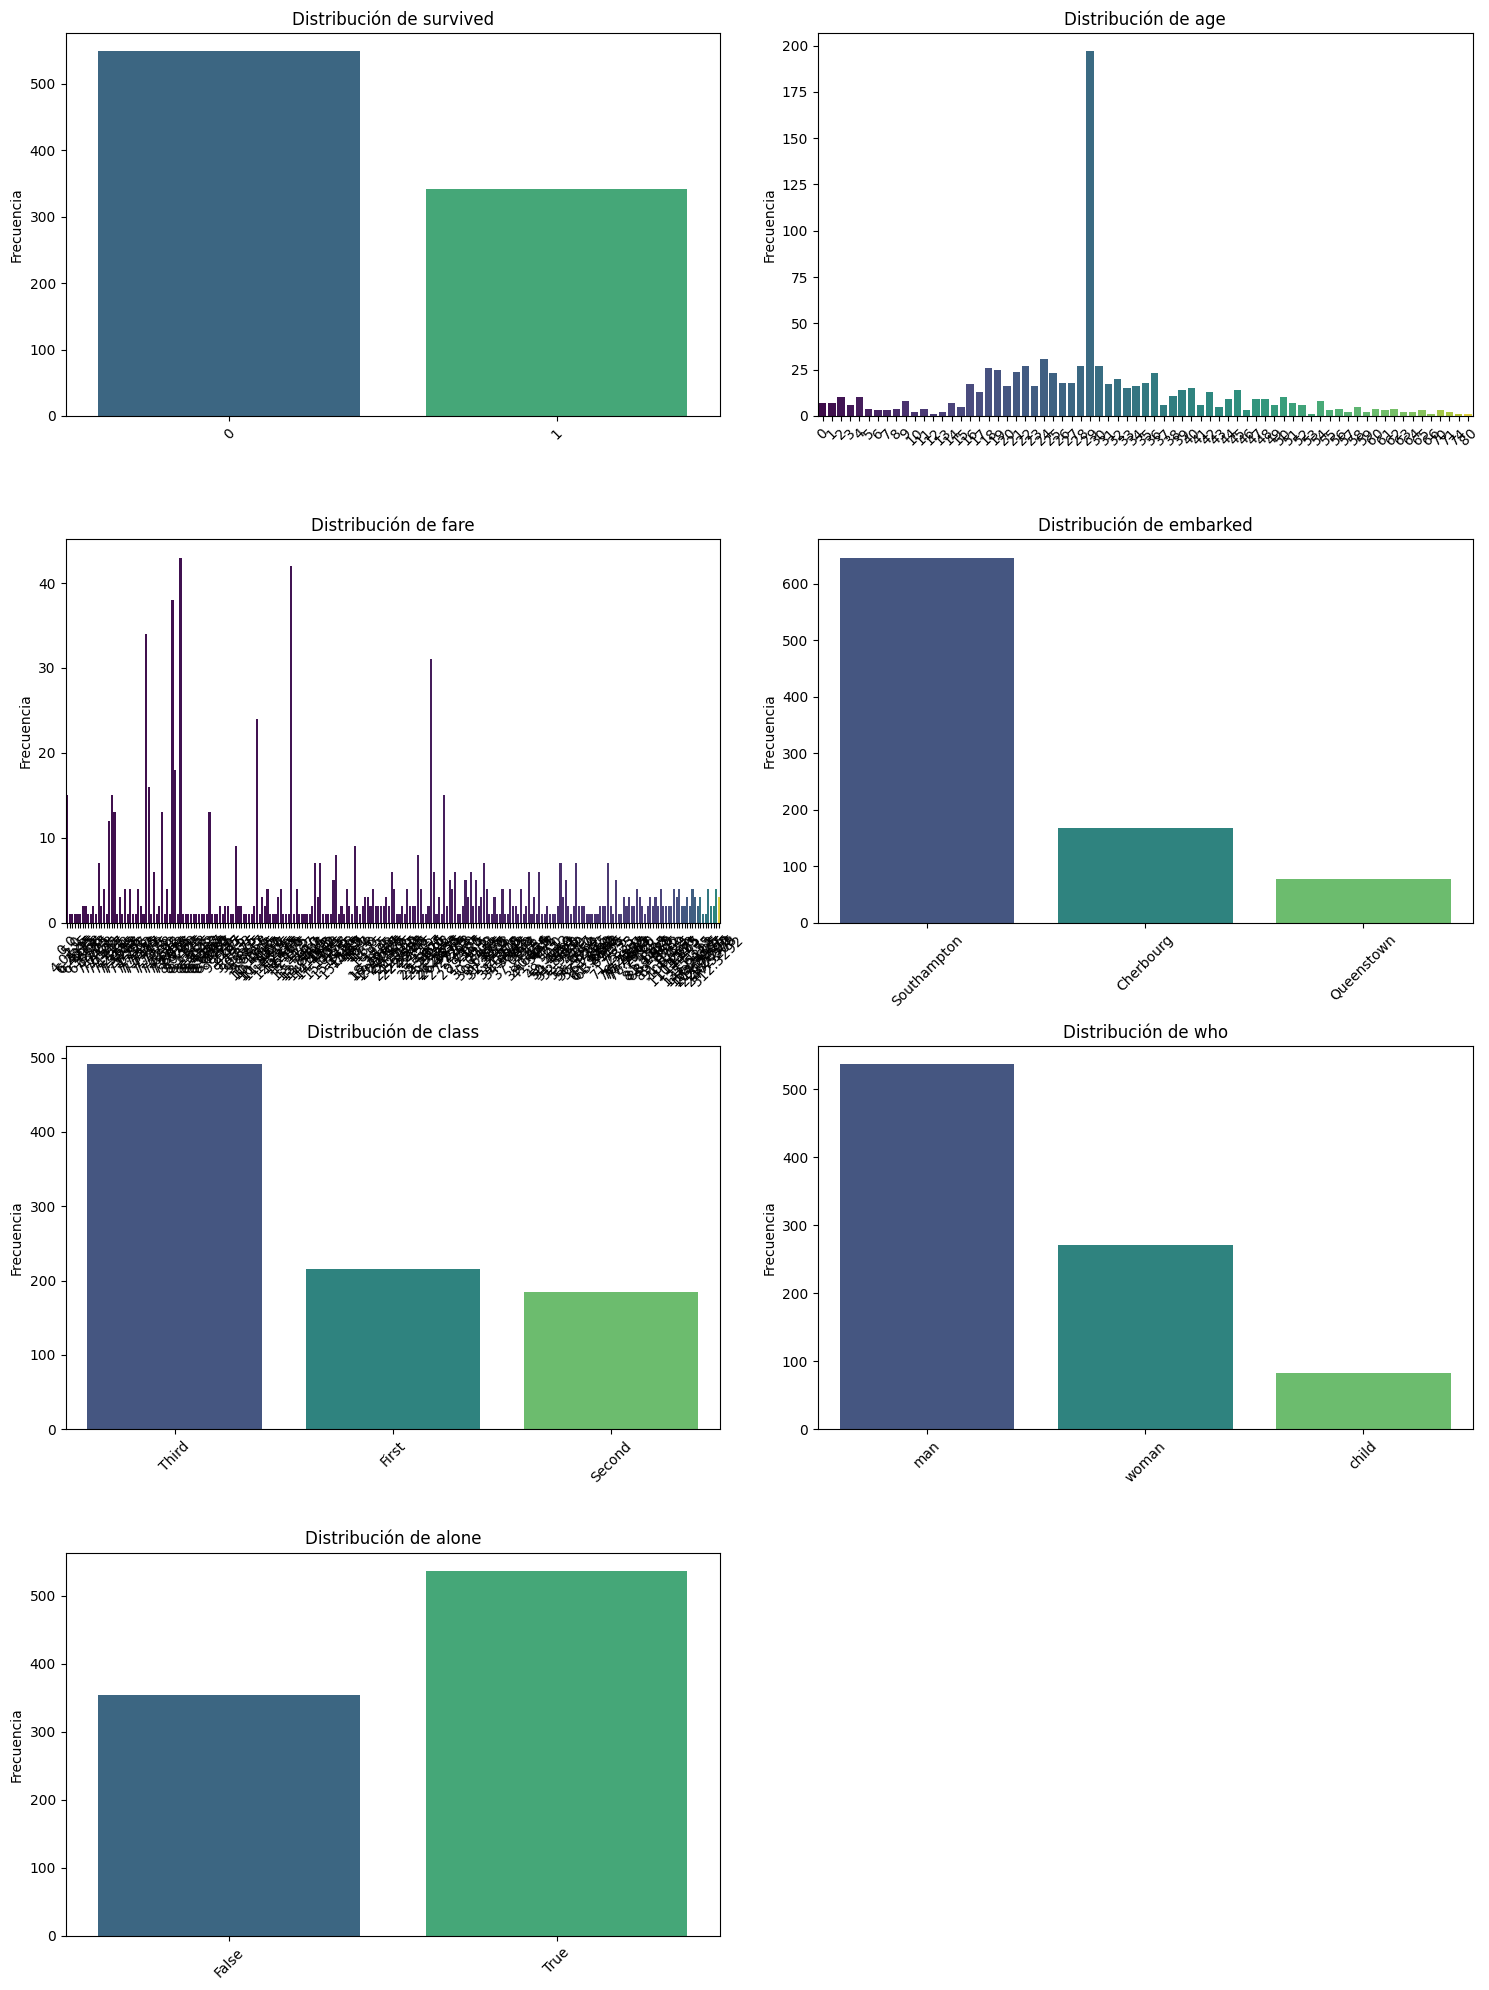

In [31]:
# VISUALIZACIÓN:
pinta_distribucion_categoricas(df_titanic_2, categoricas_titanic)

In [32]:
# FRECUENCIAS RELATIVAS:
for categoria in categoricas_titanic:
    print(f"Para {categoria}")
    print(df_titanic_2[categoria].value_counts()/len(df_titanic_2)*100)
    print("\n*2")


Para survived
survived
0    61.616162
1    38.383838
Name: count, dtype: float64

*2
Para age
age
29    22.109989
24     3.479237
22     3.030303
28     3.030303
30     3.030303
        ...    
66     0.112233
53     0.112233
80     0.112233
12     0.112233
74     0.112233
Name: count, Length: 71, dtype: float64

*2
Para fare
fare
8.0500     4.826038
13.0000    4.713805
7.8958     4.264871
7.7500     3.815937
26.0000    3.479237
             ...   
35.0000    0.112233
28.5000    0.112233
6.2375     0.112233
14.0000    0.112233
10.5167    0.112233
Name: count, Length: 248, dtype: float64

*2
Para embarked
embarked
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: count, dtype: float64

*2
Para class
class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64

*2
Para who
who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64

*2
Para alone
alone
True     60.26936
False    39.73064
Name: co

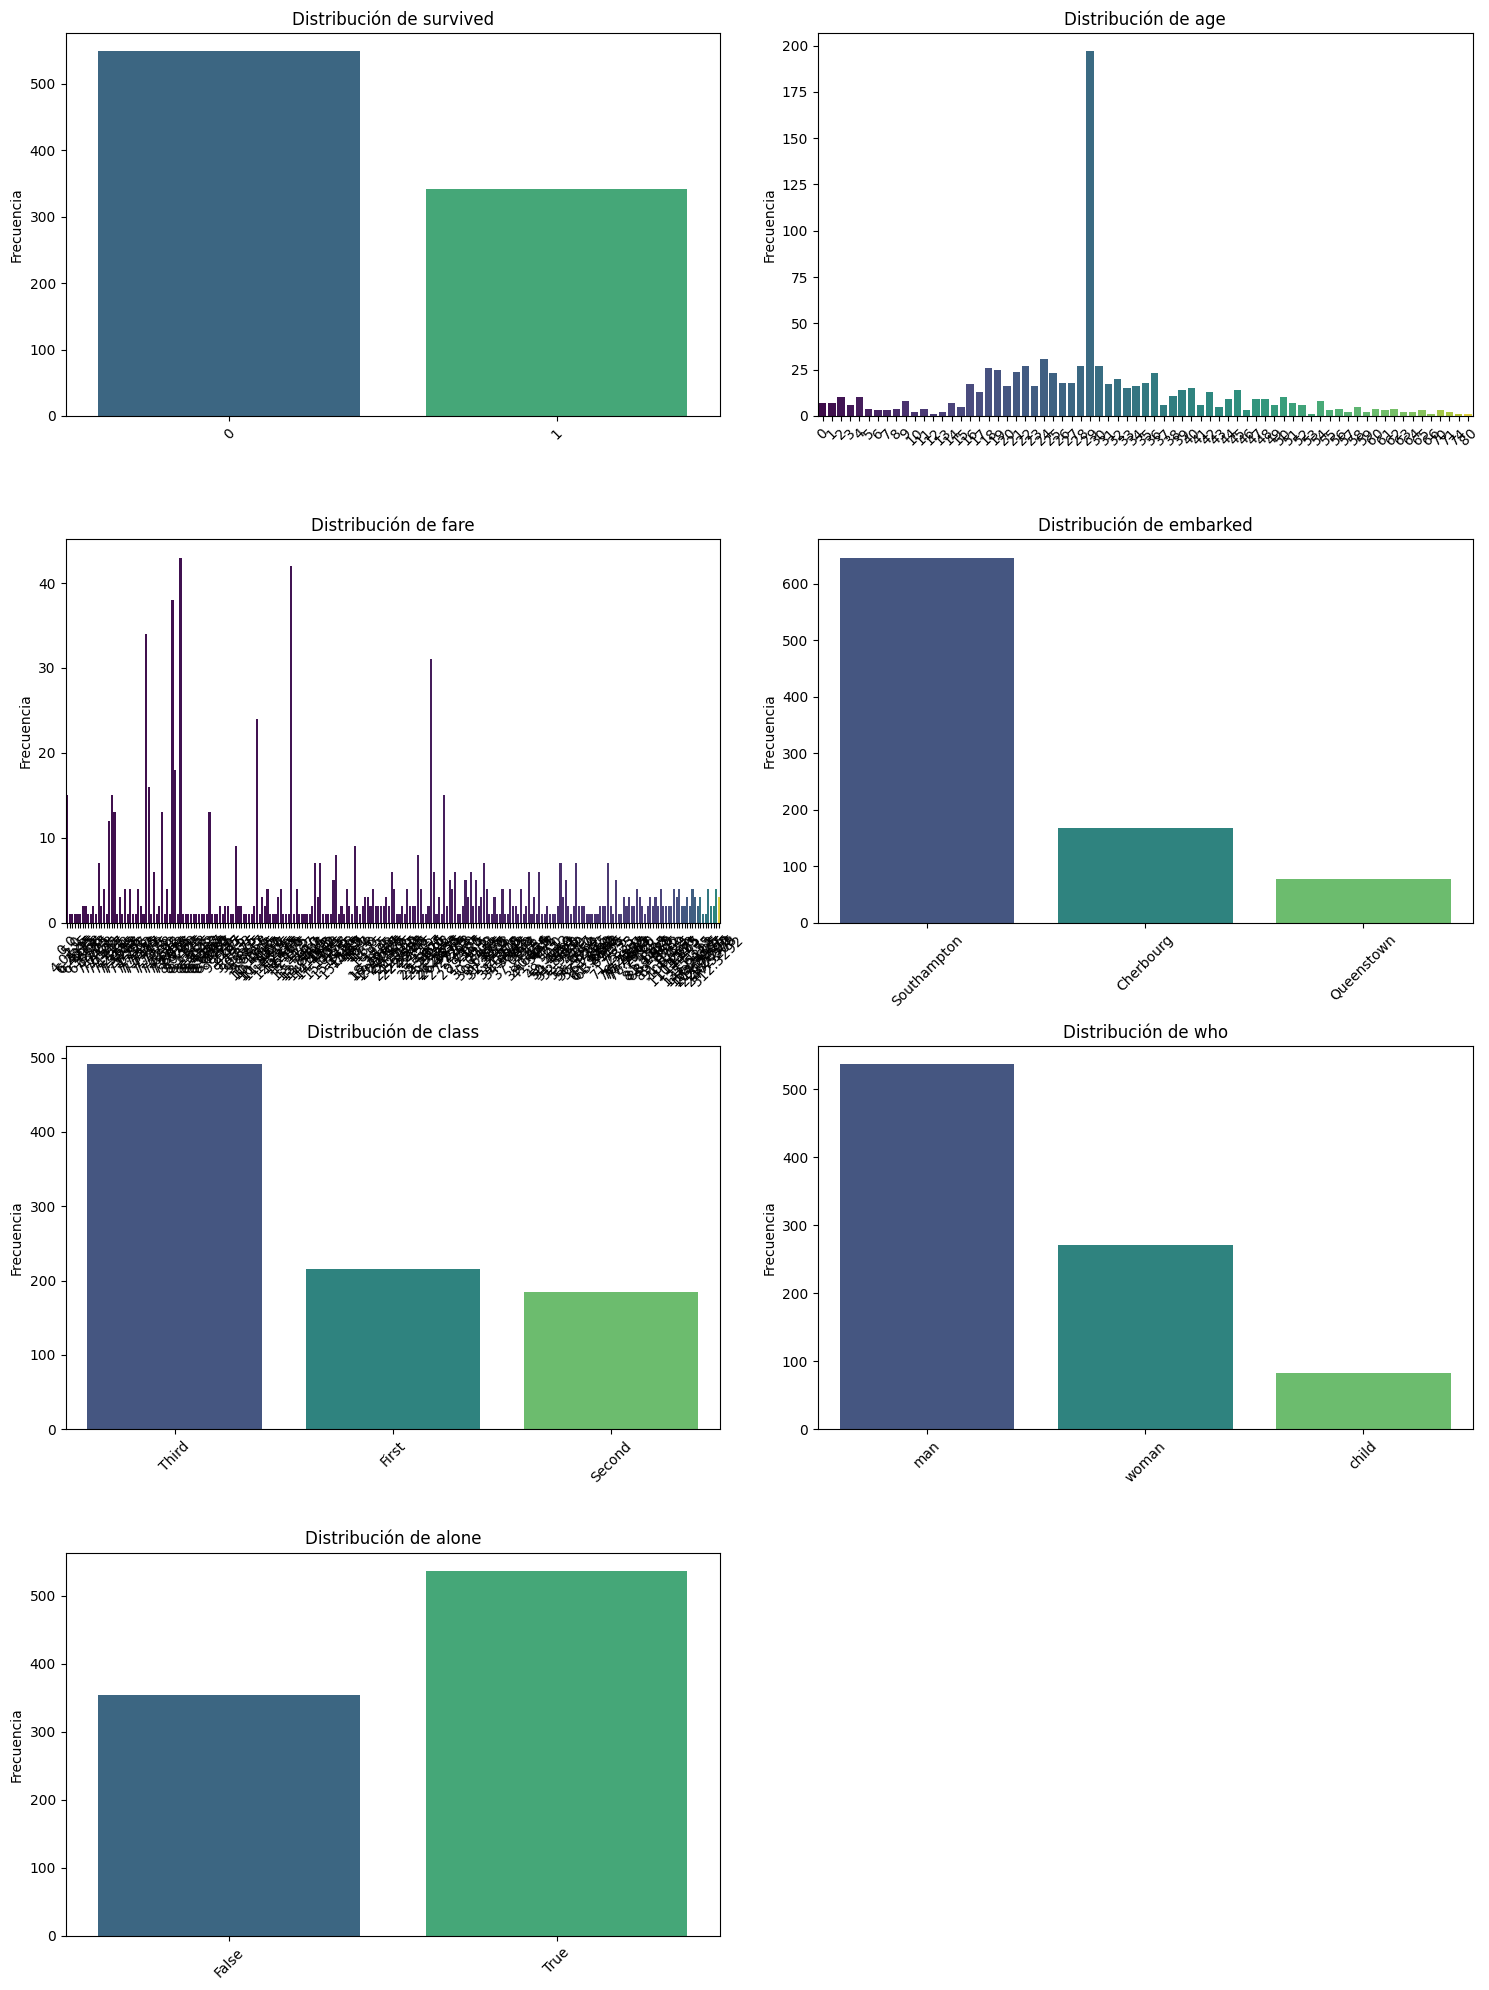

In [33]:
pinta_distribucion_categoricas(df_titanic_2, categoricas_titanic)

In [39]:
# PERCENTILES:
print(df_titanic_2["age"].quantile(0.5),
    df_titanic_2["age"].quantile(0.9), 
      df_titanic_2["age"].quantile(0.95),
     df_titanic_2["age"].max())

# En cuanto a la edad, el 50% estaban en 29 años;
# el siguiente 40% estaba en 47 años
# el siguiente 5% en 54 años
# y el máximo de edad era de 80 años.


29.0 47.0 54.0 80


In [ ]:
# Voy a ver la clase para aclararme sobre qué analizar como percentil, varianza, dispersión, outliers ...

### CLASIFICACIÓN DE LOS TIPOS DE VARIABLES ###

In [35]:
# Buscamos la cardinalidad:
df_tipos = pd.DataFrame([df_titanic_2.nunique(), df_titanic_2.nunique()/len(df_titanic_2) * 100, df_titanic_2.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipos

,Card,%_Card,Tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,71,7.968575,int64
sibsp,7,0.785634,int64
parch,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,object
who,3,0.3367,object


In [36]:
# y la clasificamos:
df_tipos["Clasificada_como"] = "Categorica" 
df_tipos.loc[df_tipos.Card == 2, "Clasificada_como"] = "Binaria"
df_tipos.loc[df_tipos["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipos.loc[df_tipos["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipos

,Card,%_Card,Tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,71,7.968575,int64,Numerica Discreta
sibsp,7,0.785634,int64,Categorica
parch,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica Discreta
embarked,3,0.3367,object,Categorica
class,3,0.3367,object,Categorica
who,3,0.3367,object,Categorica


| Columna/Variable | Descripción | Tipo variable | Importancia inicial |
| ---------------- | ----------- | ----------- | ----------- |
| survived         | si sobrevivió o no (0 no, 1 sí, valor int)| Binaria | 1 |
| pclass           | la clase en la que embarcó (igual que 'class', valor int)| -- |--  |
| sex              | sexo masculino / femenino | -- |--  |
| age              | edad | Numérica Discreta | 1 |
| sibsp            | nº hermanos o esposo/a con quienes viaja - siblings o spouse | -- |--  |
| parch            | número de parents o children con quienes viaja la persona| -- |--  |
| fare             | costo que pagó de billete | Numérica Discreta | 1 |
| embarked         | Inicial de la ciudad donde embarcó (igual que 'embark_town')| Categórica | 1 |
| class            | Clase en la que embarcó (igual que 'pclass' pero valor str) | Categórica | 1 |
| who              | hombre / mujer - igual que 'sex' pero con otro término| Categórica | 1 |
| adult_male       | Si era hombre adulto o no, bool | -- |--  |
| embark_town      | Desde dónde embarcó, igual que 'embarked' | -- |--  |
| alive            | Si sobrevivió o no (igual que 'survived' pero valor str) | -- |--  |
| alone            | True si viajaba solo; False si viajaba acompañado, bool |Binaria | 1 |


### #2.1 Categóricas

In [37]:
df_tipos.loc[df_tipos["Clasificada_como"] == "Categorica"]

,Card,%_Card,Tipo,Clasificada_como
pclass,3,0.3367,int64,Categorica
sibsp,7,0.785634,int64,Categorica
parch,7,0.785634,int64,Categorica
embarked,3,0.3367,object,Categorica
class,3,0.3367,object,Categorica
who,3,0.3367,object,Categorica
embark_town,3,0.3367,object,Categorica


### #2.2 Numéricas

In [38]:
df_tipos.loc[df_tipos["Clasificada_como"] == "Numerica Discreta"]

,Card,%_Card,Tipo,Clasificada_como
age,71,7.968575,int64,Numerica Discreta
fare,248,27.833895,float64,Numerica Discreta
